<a href="https://colab.research.google.com/github/tpenanen/Laptop-Price-Project/blob/main/Clustering_(Non_Pipeline).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import mean_squared_error
data = pd.read_csv('laptop_price.csv', encoding = 'latin1')
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_usd
0,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.0,436.7600
1,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.0,840.7630
2,37,Acer,Aspire 3,Notebook,15.6,1366x768,Intel Core i3 7130U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Linux,2.1kg,367.0,400.7273
3,44,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,256GB SSD,Intel UHD Graphics 620,Windows 10,2.2kg,682.0,744.6758
4,52,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,2.2kg,841.0,918.2879


In [20]:
# This is the complete label-encoding needed for clutering:

#COMPANY LABEL ENCODING
name = data["Company"]
Company_names = []
Acer_count = Apple_count=Asus_count=Chuwi_count = Dell_count = Fujitsu_count= Google_count = HP_count = Huawei_count = Lenovo_count = LG_count = Media_count = Microsoft_count=0
Msi_count = razer_count = samsung_count = toshi_count = vero_count = Xiaomi_count = 0
for c in name:
  c = c.strip()
  if c == "Acer":
    Acer_count+=1
    Company_names.append("Acer")
  if c == "Apple":
    Apple_count+=1
    Company_names.append("Apple")
  if c == "Asus":
    Asus_count+=1
    Company_names.append("Asus")
  if c == "Chuwi":
    Chuwi_count+=1
    Company_names.append("Chuwi")
  if c == "Dell":
    Dell_count+=1
    Company_names.append("Dell")
  if c == "Fujitsu":
    Fujitsu_count+=1
    Company_names.append("Fujitsu")
  if c == "Google":
    Google_count+=1
    Company_names.append("Google")
  if c == "HP":
    HP_count+=1
    Company_names.append("HP")
  if c == "Huawei":
    Huawei_count+=1
    Company_names.append("Huawei")
  if c == "Lenovo":
    Lenovo_count+=1
    Company_names.append("Lenovo")
  if c == "LG":
    LG_count+=1
    Company_names.append("LG")
  if c == "Mediacom":
    Media_count+=1
    Company_names.append("Mediacom")
  if c == "Microsoft":
    Microsoft_count+=1
    Company_names.append("Microsoft")
  if c == "MSI":
    Msi_count+=1
    Company_names.append("MSI")
  if c == "Razer":
    Company_names.append("Razer")
    razer_count+=1
  if c == "Samsung":
    Company_names.append("Samsung")
    samsung_count+=1
  if c == "Toshiba":
    Company_names.append("Toshiba")
    toshi_count+=1
  if c == "Vero":
    Company_names.append("Vero")
    vero_count+=1
  if c == "Xiaomi":
    Company_names.append("Xiaomi")
    Xiaomi_count+=1


data["Company_converted"] = Company_names

le = LabelEncoder()
data['Company_Label'] = le.fit_transform(data['Company_converted'])

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

#END OF LABEL ENCODING FOR COMPANY


#START OF LABEL ENCODING FOR TYPENAME
Type = data["TypeName"]
note_count = 0
ultra_count = 0
conv_count = 0
gaming_count = 0
net_count = 0
work_count = 0
print(data["TypeName"].unique())
Type_names = []
for t in Type:
  if t == "Notebook":
    note_count +=1
    Type_names.append("Notebook")
  if t == "Ultrabook":
    ultra_count += 1
    Type_names.append("Ultrabook")
  if t == "2 in 1 Convertible":
    conv_count += 1
    Type_names.append("Convertible")
  if t == "Gaming":
    Type_names.append("Gaming")
    gaming_count += 1
  if t == "Netbook":
    net_count += 1
    Type_names.append("Netbook")
  if t == "Workstation":
    Type_names.append("Workstation")
    work_count += 1
print(note_count)
print(ultra_count)
print(conv_count)
print(gaming_count)
print(net_count)
print(work_count)

data["TypeName_converted"] = Type_names

le = LabelEncoder()
data['TypeName_Label'] = le.fit_transform(data['TypeName_converted'])

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
#END OF LABEL ENCODING FOR TYPENAME



#START OF ENCODING FOR CPU
import pandas as pd
from sklearn.preprocessing import LabelEncoder
CPU = data["Cpu"]
Cpu_brands = []
for m in CPU:
  Cpu_split= m.split(" ")
  if Cpu_split[0] == "Intel":
    if Cpu_split[1] == "Core":
      if Cpu_split[2] == "i3":
        Cpu_brands.append("Core i3")
      if Cpu_split[2] == "i5":
        Cpu_brands.append("Core i5")
      if Cpu_split[2] == "i7":
        Cpu_brands.append("Core i7")
      if Cpu_split[2] == "M":
        Cpu_brands.append("Core M")
    if Cpu_split[1] == "Xeon":
      Cpu_brands.append("Xeon")
    if Cpu_split[1] == "Pentium":
      Cpu_brands.append("Pentium")
    if Cpu_split[1] == "Celeron":
      Cpu_brands.append("Celeron")
    if Cpu_split[1] == "Atom":
      Cpu_brands.append("Atom")

  if Cpu_split[0] == "AMD":
    Cpu_brands.append("AMD")

  if Cpu_split[0] == "Samsung":
    Cpu_brands.append("Samsung")



data["Cpu_Brands"] = Cpu_brands

le = LabelEncoder()
data['Cpu_Brands_Label'] = le.fit_transform(data['Cpu_Brands'])

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
#END OF ENCODING FOR CPU


# START OF ENCODING OF RAM
print(data["Ram"].unique())
ram = data["Ram"]
ram_types = []
count_2=count_4=count_6=count_8=count_12=count_16=count_24=count_32=count_64=0
for r in ram:
  if r == "2GB":
    ram_types.append("2")
    count_2+=1
  if r == "4GB":
    count_4+=1
    ram_types.append("4")
  if r == "6GB":
    count_6 +=1
    ram_types.append("6")
  if r == "8GB":
    count_8+=1
    ram_types.append("8")
  if r == "12GB":
    count_12+=1
    ram_types.append("12")
  if r == "16GB":
    count_16+=1
    ram_types.append("16")
  if r == "24GB":
    count_24+=1
    ram_types.append("24")
  if r == "32GB":
    count_32+=1
    ram_types.append("32")
  if r == "64GB":
    count_64+=1
    ram_types.append("64")

data["Ram_types"] = ram_types
#END OF ENCODING FOR RAM

#START OF ENCODING GPU
a = data['Gpu']
intel_count = 0
Nvidia_count = 0
Amd_count = 0
Gpu_brands = []
for i in a:
  m = i.split(" ")
  if m[0] == "Intel":
    intel_count +=1
    Gpu_brands.append("Intel")
  if m[0] == "Nvidia":
    Nvidia_count += 1
    Gpu_brands.append("Nvidia")
  if m[0] == "AMD":
    Amd_count +=1
    Gpu_brands.append("AMD")
  if m[0] == "ARM":
    Gpu_brands.append("ARM")
print(intel_count)
print(Nvidia_count)
print(Amd_count)
print(intel_count+Amd_count+Nvidia_count)
data["Gpu_Brands"] = Gpu_brands

le = LabelEncoder()
data['Gpu_Brands_Label'] = le.fit_transform(data['Gpu_Brands'])

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
#END OF ENCODING GPU

#START OF ENCODING FOR OPERATING SYSTEM
OP = data["OpSys"]
op_systems = []
for o in OP:
  if o == "Windows 10":
    op_systems.append("Windows 10")
  if o == "Windows 10 S":
    op_systems.append("Windows 10")
  if o == "Windows 7":
    op_systems.append("Windows 7")
  if o == "Linux":
    op_systems.append("Linux")
  if o == "Mac OS X":
    op_systems.append("Mac OS")
  if o == "macOS":
    op_systems.append("Mac OS")
  if o == "No OS":
    op_systems.append("No OS")
  if o == "Chrome OS":
    op_systems.append("Chrome OS")
  if o == "Android":
    op_systems.append("Android")
data["Operating_system"] = op_systems

le = LabelEncoder()
data['OperatingSys_label'] = le.fit_transform(data['Operating_system'])

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
#END OF ENCODING OPERATING SYSTEM

#START OF ENCODING MEMORY
def memory_to_gb(mem_string):
    mem_string = mem_string.upper().replace(' ', '')
    parts = mem_string.split('+')
    total_gb = 0
    for part in parts:
        if 'TB' in part:
            num = part.split('TB')[0]
            try:
                total_gb += float(num) * 1000
            except:
                continue
        elif 'GB' in part:
            num = part.split('GB')[0]
            try:
                total_gb += float(num)
            except:
                continue
    return total_gb
data['Memory_GB'] = data['Memory'].apply(memory_to_gb)

#END OF ENCODING MEMORY

# CONVERTING WEIGHT INTO NUMERICAL
data["Weight"] = data["Weight"].str.replace("kg", "")

Label mapping: {'Acer': np.int64(0), 'Apple': np.int64(1), 'Asus': np.int64(2), 'Chuwi': np.int64(3), 'Dell': np.int64(4), 'Fujitsu': np.int64(5), 'Google': np.int64(6), 'HP': np.int64(7), 'Huawei': np.int64(8), 'LG': np.int64(9), 'Lenovo': np.int64(10), 'MSI': np.int64(11), 'Mediacom': np.int64(12), 'Microsoft': np.int64(13), 'Razer': np.int64(14), 'Samsung': np.int64(15), 'Toshiba': np.int64(16), 'Vero': np.int64(17), 'Xiaomi': np.int64(18)}
['Notebook' 'Ultrabook' '2 in 1 Convertible' 'Gaming' 'Netbook'
 'Workstation']
727
196
121
205
25
29
Label mapping: {'Convertible': np.int64(0), 'Gaming': np.int64(1), 'Netbook': np.int64(2), 'Notebook': np.int64(3), 'Ultrabook': np.int64(4), 'Workstation': np.int64(5)}
Label mapping: {'AMD': np.int64(0), 'Atom': np.int64(1), 'Celeron': np.int64(2), 'Core M': np.int64(3), 'Core i3': np.int64(4), 'Core i5': np.int64(5), 'Core i7': np.int64(6), 'Pentium': np.int64(7), 'Samsung': np.int64(8), 'Xeon': np.int64(9)}
['4GB' '8GB' '6GB' '12GB' '2GB' '16

In [21]:
# Drops all the columns that have strings in them:

data = data.drop(['Company',
                  'Product',
                  'TypeName',
                  'ScreenResolution',
                  'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys',
                  'Company_converted', 'TypeName_converted',
                  'Cpu_Brands', 'Gpu_Brands', 'Operating_system'], axis=1)

data.head()

data.describe()

,laptop_ID,Inches,Price_euros,Price_usd,Company_Label,TypeName_Label,Cpu_Brands_Label,Gpu_Brands_Label,OperatingSys_label,Memory_GB
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992,1226.953826,6.442824,2.582502,4.851113,2.029931,4.718342,610.904068
std,381.172104,1.426304,699.009043,763.247974,4.084128,1.245231,1.628546,0.927409,0.932281,467.509021
min,1.000000,10.100000,174.000000,189.990600,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,331.500000,14.000000,599.000000,654.048100,4.000000,1.500000,5.000000,2.000000,5.000000,256.000000
50%,659.000000,15.600000,977.000000,1066.786300,7.000000,3.000000,5.000000,2.000000,5.000000,500.000000
75%,990.500000,15.600000,1487.880000,1624.616172,10.000000,3.000000,6.000000,3.000000,5.000000,1000.000000
max,1320.000000,18.400000,6099.000000,6659.498100,18.000000,5.000000,9.000000,3.000000,6.000000,2512.000000


In [22]:
# Clustering before pre-processing (but with label-encoding)starts here:

# Gets all the clusters
kmeans = KMeans(n_clusters = 11, random_state = 30)
y_kmeans = kmeans.fit_predict(data)
kmeans.cluster_centers_


# Calculates the MSE
weighted_mse = 0
y = data['Price_euros']
for cluster_index in range(kmeans.n_clusters):
  y_in_cluster = y[y_kmeans == cluster_index] # I made this line of code with the help of AI
  mse = mean_squared_error(y_in_cluster, [y_in_cluster.mean()] * len(y_in_cluster))
  weighted_mse += (len(y_in_cluster) / len(y)) * mse
print(weighted_mse)

43401.79318629258


Clustering before pre-processing (but with label-encoding) ends here.

In [23]:
# Clustering with z-score normalization starts here:

standard_scaler = StandardScaler()
data_standard_scaler = standard_scaler.fit_transform(data.drop('Price_euros',axis=1))
kmeans = KMeans(n_clusters = 11, random_state = 30)
y_kmeans = kmeans.fit_predict(data_standard_scaler)
kmeans.cluster_centers_

weighted_mse = 0
y = data['Price_euros']
for cluster_index in range(kmeans.n_clusters):
  y_in_cluster = y[y_kmeans == cluster_index]
  mse = mean_squared_error(y_in_cluster, [y_in_cluster.mean()] * len(y_in_cluster))
  weighted_mse += (len(y_in_cluster) / len(y)) * mse
print(weighted_mse)

188616.41511521174


Clustering with z-score normalization ends here.

In [24]:
# Clustering with min-max normalization starts here:

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
data_min_max_scaler = min_max_scaler.fit_transform(data.drop('Price_euros',axis=1))
kmeans = KMeans(n_clusters = 11, random_state = 30)
y_kmeans = kmeans.fit_predict(data_min_max_scaler)
kmeans.cluster_centers_

weighted_mse = 0
y = data['Price_euros']
for cluster_index in range(kmeans.n_clusters):
  y_in_cluster = y[y_kmeans == cluster_index]
  mse = mean_squared_error(y_in_cluster, [y_in_cluster.mean()] * len(y_in_cluster))
  weighted_mse += (len(y_in_cluster) / len(y)) * mse
print(weighted_mse)

379222.4316104201


Clustering with min-max normalization ends here.

Using the model without pre-processing, I am going to repeatedly change the k values and get the various different cluster ranges and see the price ranges
per cluster.

In [25]:
weighted_mse_total = []

for k in [2, 4, 8, 16, 32, 64, 128]:
  kmeans = KMeans(n_clusters = k, random_state = 30)
  y_kmeans = kmeans.fit_predict(data)
  kmeans.cluster_centers_
  weighted_mse = 0

  y = data['Price_euros']
  for cluster_index in range(kmeans.n_clusters):
    y_in_cluster = y[y_kmeans == cluster_index]

    # These 3 lines of code were made with the help of AI.
    print(f"Cluster {cluster_index}: Size={len(y_in_cluster)}, "
      f"Price range=€{y_in_cluster.min():.0f}-€{y_in_cluster.max():.0f}, "
      f"Mean=€{y_in_cluster.mean():.0f}")

    mse = mean_squared_error(y_in_cluster, [y_in_cluster.mean()] * len(y_in_cluster))
    weighted_mse += (len(y_in_cluster) / len(y)) * mse
  weighted_mse_total.append(weighted_mse)

total_weighted_mse_value = sum(weighted_mse_total)

Cluster 0: Size=950, Price range=€174-€1429, Mean=€783
Cluster 1: Size=353, Price range=€1396-€6099, Mean=€2042
Cluster 0: Size=507, Price range=€174-€833, Mean=€522
Cluster 1: Size=455, Price range=€759-€1499, Mean=€1091
Cluster 2: Size=253, Price range=€1390-€2339, Mean=€1793
Cluster 3: Size=88, Price range=€2242-€6099, Mean=€2836
Cluster 0: Size=198, Price range=€174-€989, Mean=€583
Cluster 1: Size=197, Price range=€1409-€2297, Mean=€1823
Cluster 2: Size=232, Price range=€252-€1407, Mean=€801
Cluster 3: Size=10, Price range=€3499-€6099, Mean=€4345
Cluster 4: Size=92, Price range=€2099-€3299, Mean=€2581
Cluster 5: Size=178, Price range=€745-€1519, Mean=€1072
Cluster 6: Size=208, Price range=€192-€810, Mean=€475
Cluster 7: Size=188, Price range=€881-€1637, Mean=€1241
Cluster 0: Size=117, Price range=€174-€752, Mean=€468
Cluster 1: Size=106, Price range=€1629-€2251, Mean=€1913
Cluster 2: Size=69, Price range=€889-€1499, Mean=€1168
Cluster 3: Size=4, Price range=€4389-€6099, Mean=€5222


That has been completed.

In [26]:
# In order to improve the model, I'm using a correlation matrix to find which
# features to use.

price_corr = data.corr()['Price_euros'].abs().sort_values(ascending=False)


important_features = ['Price_euros', 'Ram_types',
                      'Cpu_Brands_Label', 'Gpu_Brands_Label'
                      , 'OperatingSys_label']


# Adding weights to the important features.
important_data = data[important_features]

# Now I'm going to do what I did above, except with the pre-processed data set.

total_weighted_mse_tuned = []
for k_values in [2, 4, 8, 16, 32, 64, 128]:
  kmeans = KMeans(n_clusters = k_values, random_state = 30)
  y_kmeans = kmeans.fit_predict(important_data)
  kmeans.cluster_centers_
  weighted_mse = 0


  y = data['Price_euros']
  for cluster_index in range(kmeans.n_clusters):
    y_in_cluster = y[y_kmeans == cluster_index]

    # These 3 lines were generated with the help of AI.
    print(f"Cluster {cluster_index}: Size={len(y_in_cluster)}, "
          f"Price range=€{y_in_cluster.min():.0f}-€{y_in_cluster.max():.0f}, "
          f"Mean=€{y_in_cluster.mean():.0f}")

    mse = mean_squared_error(y_in_cluster, [y_in_cluster.mean()] * len(y_in_cluster))
    weighted_mse += (len(y_in_cluster) / len(y)) * mse
  total_weighted_mse_tuned.append(weighted_mse)

total_weighted_mse_tuned_value = sum(total_weighted_mse_tuned)


Cluster 0: Size=935, Price range=€174-€1390, Mean=€773
Cluster 1: Size=368, Price range=€1396-€6099, Mean=€2016
Cluster 0: Size=556, Price range=€174-€855, Mean=€549
Cluster 1: Size=458, Price range=€857-€1549, Mean=€1165
Cluster 2: Size=52, Price range=€2559-€6099, Mean=€3132
Cluster 3: Size=237, Price range=€1559-€2537, Mean=€1953
Cluster 0: Size=281, Price range=€174-€553, Mean=€397
Cluster 1: Size=152, Price range=€1637-€2103, Mean=€1851
Cluster 2: Size=34, Price range=€2750-€3975, Mean=€3090
Cluster 3: Size=275, Price range=€889-€1230, Mean=€1056
Cluster 4: Size=4, Price range=€4389-€6099, Mean=€5222
Cluster 5: Size=184, Price range=€1244-€1629, Mean=€1416
Cluster 6: Size=76, Price range=€2122-€2729, Mean=€2391
Cluster 7: Size=297, Price range=€557-€884, Mean=€716
Cluster 0: Size=158, Price range=€411-€582, Mean=€498
Cluster 1: Size=71, Price range=€1559-€1770, Mean=€1669
Cluster 2: Size=29, Price range=€2559-€2899, Mean=€2734
Cluster 3: Size=141, Price range=€935-€1109, Mean=€102

Now I will be including visualizations of the code:

346316.0774172405
256232.7466529367


<BarContainer object of 2 artists>

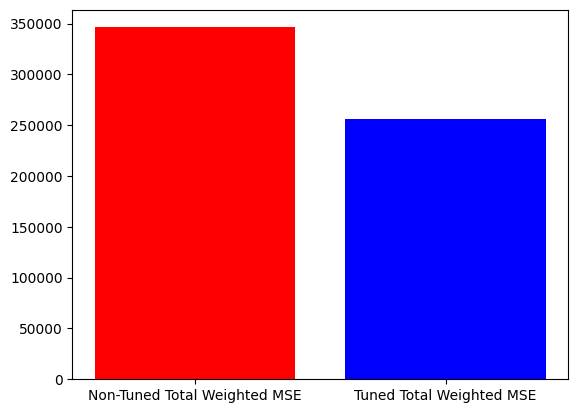

In [29]:
x_values = ['Non-Tuned Total Weighted MSE', 'Tuned Total Weighted MSE']
y_values = [total_weighted_mse_value, total_weighted_mse_tuned_value]
print(total_weighted_mse_value)
print(total_weighted_mse_tuned_value)
plt.bar(x_values, y_values, color = ['red', 'blue'])